# Cohort Retention & RFM Analysis
### Moch. Nur Faisal's Portofolio Project

## Bussiness Understanding
### **Context**

Pada project ini saya akan menjadi seorang Data Scientist pada sebuah perusahaan retail online. Dataset pada project ini mencakup semua transaksi yang terjadi antara 12/01/2010 dan 12/09/2011 untuk ritel online non-toko yang berbasis di Inggris yang terdaftar. Perusahaan ini khususnya berfokus pada penjualan hadiah yang bersifat unik untuk segala jenis event. Mayoritas pelanggan perushaan adalah pedagang grosir.

### **Stakeholder**:
Stakeholder pada project ini adalah Tim Manajemen Bisnis. Tim Manajemen Bisnis memiliki tanggung jawab untuk memahami perilaku pelanggan dan mengevaluasi efektivitas strategi retensi.

### **Problem Statement**:
Tim Manajemen Bisnis yang merupakan stakeholder ingin memahami seberapa efektif retensi pelanggan dari waktu ke waktu. Dengan pemahaman ini, stakeholder dapat mengidentifikasi pola pembelian pelanggan dari berbagai kohort dan mengoptimalkan strategi retensi untuk meningkatkan loyalitas pelanggan.

### **Goal**:
Tujuan dari project ini adalah untuk menganalisa kohort retensi dan mengidentifikasi tren pembelian dari waktu ke waktu. Dengan pemahaman ini stakeholder dapat mengoptimalkan upaya retensi untuk mempertahankan pelanggan yang lebih lama dan meningkatkan retensi secara keseluruhan.

### **Analytical Approach**:
Analisis kohort retensi akan dilakukan untuk memahami tingkat retensi pelanggan dari waktu ke waktu. Berikut adalah langkah-langkah dalam pendekatan analitis:

1. `Pembuatan Kohort`: Pertama, pelanggan akan dikelompokkan ke dalam kohort berdasarkan waktu pertama mereka melakukan transaksi. Misalnya, pelanggan yang melakukan transaksi pertama kali pada bulan Januari 2010 akan menjadi kohort Januari 2010, dan seterusnya.
1. `Analisa Retensi`: Setelah kohort terbentuk, akan dilakukan analisis retensi untuk setiap kohort. Ini melibatkan mengukur persentase pelanggan yang tetap aktif dari kohort asli dari waktu ke waktu. Ini dapat dilakukan dengan mengamati berapa banyak pelanggan dari setiap kohort yang melakukan transaksi pada bulan-bulan berikutnya.
1. `Visualisasi dengan Heatmap` : Data retensi kohort akan divisualisasikan menggunakan heatmap. Heatmap akan menunjukkan tingkat retensi untuk setiap kohort dari waktu ke waktu. Ini memungkinkan untuk dengan jelas melihat pola retensi dan mengidentifikasi kohort yang memiliki retensi yang lebih tinggi atau lebih rendah.

1. `Analisa Trend`: Selain itu, akan dilakukan analisis tren untuk mengidentifikasi pola pembelian pelanggan dari waktu ke waktu. Ini akan membantu dalam memahami apakah ada tren peningkatan atau penurunan retensi pelanggan dari kohort ke kohort. 

1. `Analisa RFM`: Analisa RFM dilakukan untuk mencari segmentasi pelanggan, dengan pendekatan ini perusahaan dapat memperoleh wawasan yang berharga tentang efektivitas strategi retensi mereka dan mengidentifikasi strategi marketing agar retensi meningkat.

In [1]:
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## Data Understanding

Data pada project ini menggunakan Online Retail Dataset yang dapat diakses melalui link [ini](https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset).

In [2]:
df = pd.read_csv('online_retail.csv')

In [3]:
#chedk overview of data
df.info()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom


Berdasarkan informarsi di atas didapatkan beberapa hal yang perlu dilakukan pada dataset:
1. Karena jumlah baris data pada dataset banyak, saya akan drop baris data yang memiliki null value.
2. Merubah tipe data pada beberapa kolom, yaitu InvoiceDate, CustomerID, dan InvoiceNo.

In [4]:
# Convert 'date' column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filter rows where date is in January 2011
mask = (df['InvoiceDate'] >= '2011-01-30') & (df['InvoiceDate'] <= '2011-01-31')
filtered_df = df[mask]


In [5]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 722 entries, 75397 to 76118
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    722 non-null    object        
 1   StockCode    722 non-null    object        
 2   Description  722 non-null    object        
 3   Quantity     722 non-null    int64         
 4   InvoiceDate  722 non-null    datetime64[ns]
 5   UnitPrice    722 non-null    float64       
 6   CustomerID   722 non-null    float64       
 7   Country      722 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 50.8+ KB


Dataset memiliki data pada bulan Desember 2011 sampai tanggal 31.

### 1. Import data

In [6]:
retention=pd.read_csv('online_retail.csv',
                     dtype={
                         "CustomerID":str,"InvoiceNo":str
                     },
                     parse_dates =['InvoiceDate']
                     )
retention.dropna(inplace=True)

display(retention.head(), retention.info())
# 

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


None

### 2. Cohort Analysis : Data Preprocessing

Pada analisa cohort, diperlukan feature engineering untuk mendapatkan beberapa data yang diperlukan, diantaranya:


1. **cohort_date** : Tanggal aktivitas pertama dimulai untuk setiap customer (tanggal join/open date), Tanggal transaksi pertama
2. **current_date** : Tanggal observasi/Tanggal hari ini
3. **count_user** : Banyak user berdasarkan kelompok cohort_date dan period_distance
4. **period_distance** : Jarak antara cohort_date dengan current_date

contoh :

| cohort_date | current_date | count_user | period_distance |
| -- | -- | -- | -- | 
| 2021-01 | 2021-01 | 500 | 0 |
| 2021-01 | 2021-02 | 400 | 1 |
| ... | ... | ... | ... |
| 2021-01 | 2021-12 | 50 | 11 |

**Interpretation**

1. Terdapat 500 pengguna yang melakukan registrasi pada `2021-01` 
2. Terdapat 400 pengguna yang melakukan registrasi pada `2021-01` dan melakukan transaksi kembali pada bulan  `2021-02` (retention_rate=80%)
3. ...
4. Terdapat 50 pengguna yang melakukan registrasi pada `2021-01` dan melakukan transaksi kembali pada bulan  `2021-12` (retention_rate=10%)



In [7]:
#step 1
#define cohort_month
retention['cohort_month']=retention.groupby('CustomerID')['InvoiceDate'].transform("min").dt.to_period('M')
retention.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month
539854,581443,22395,PAPERWEIGHT VINTAGE PAISLEY,36,2011-12-08 16:58:00,0.39,13026.0,United Kingdom,2011-03
277893,561195,22097,SWALLOW SQUARE TISSUE BOX,4,2011-07-25 13:57:00,0.39,14796.0,United Kingdom,2010-12
305183,563638,84997C,CHILDRENS CUTLERY POLKADOT BLUE,2,2011-08-18 10:36:00,4.15,15311.0,United Kingdom,2010-12


In [8]:
#step 2
#define current_transaction_month
retention['current_transaction_month']=retention['InvoiceDate'].dt.to_period('M')
retention=retention[['CustomerID', 'cohort_month','current_transaction_month']]
retention.drop_duplicates(inplace=True)
retention.sample(3)

,CustomerID,cohort_month,current_transaction_month
124476,16256.0,2011-03,2011-03
32400,15664.0,2010-12,2010-12
315096,15325.0,2011-08,2011-08


In [9]:
#step 3
#agregasi
cohort_retention=retention.groupby(['cohort_month','current_transaction_month'])['CustomerID'].count().reset_index()
cohort_retention.columns=['cohort_month', 'current_transaction_month', 'count_user']
cohort_retention

,cohort_month,current_transaction_month,count_user
0,2010-12,2010-12,948
1,2010-12,2011-01,362
2,2010-12,2011-02,317
3,2010-12,2011-03,367
4,2010-12,2011-04,341
...,...,...,...
86,2011-10,2011-11,93
87,2011-10,2011-12,46
88,2011-11,2011-11,321
89,2011-11,2011-12,43


In [10]:
#step 4
from operator import attrgetter
#define period number
cohort_retention['period_distance']=(cohort_retention['current_transaction_month']-cohort_retention['cohort_month']).apply(attrgetter('n'))
cohort_retention

,cohort_month,current_transaction_month,count_user,period_distance
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4
...,...,...,...,...
86,2011-10,2011-11,93,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,321,0
89,2011-11,2011-12,43,1


In [11]:
#step 5
#pivot : index=cohort_month, columns=period_distance, value=count_user
cohort_retention_pivot=cohort_retention.pivot_table(
index='cohort_month',
columns='period_distance',
values='count_user'
)
cohort_retention_pivot

period_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#step 6
#convert to percentage
cohort_size=cohort_retention_pivot.iloc[:,0]
cohort_retention_final=cohort_retention_pivot.divide(cohort_size,axis=0)
cohort_retention_final


period_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
cohort_retention_final.reset_index().to_csv('cohort_final1.csv',index=False)

In [14]:
cohort_retention_final.reset_index()

period_distance,cohort_month,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
1,2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2,2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
3,2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
4,2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
5,2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
6,2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-09,1.0,0.298658,0.325503,0.120805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
cohort_retention_final.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 13 entries, 2010-12 to 2011-12
Freq: M
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13 non-null     float64
 1   1       12 non-null     float64
 2   2       11 non-null     float64
 3   3       10 non-null     float64
 4   4       9 non-null      float64
 5   5       8 non-null      float64
 6   6       7 non-null      float64
 7   7       6 non-null      float64
 8   8       5 non-null      float64
 9   9       4 non-null      float64
 10  10      3 non-null      float64
 11  11      2 non-null      float64
 12  12      1 non-null      float64
dtypes: float64(13)
memory usage: 1.4 KB


### 3. Cohort Analysis : Data Visualization Heatmap

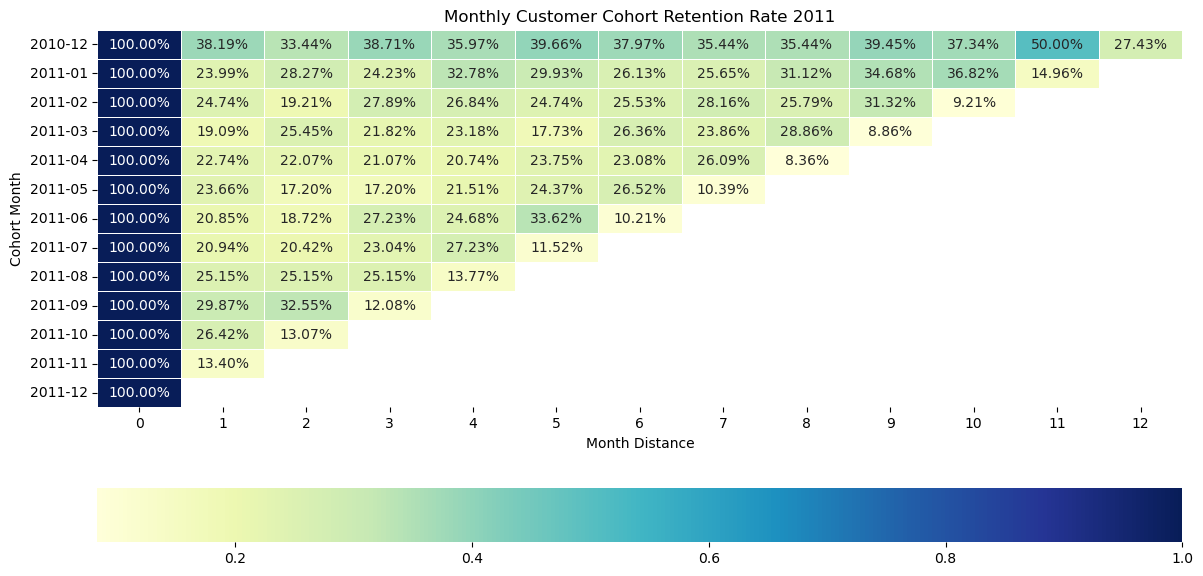

In [16]:
# Create the heatmap
plt.figure(figsize=(14, 7))
ax = sns.heatmap(cohort_retention_final,
                 annot=True,
                 fmt='.2%',
                 linewidths=0.5,
                 cbar_kws={'orientation': 'horizontal'},
                 cmap='YlGnBu')

# Set labels and title
ax.set_title('Monthly Customer Cohort Retention Rate 2011')
ax.set_ylabel('Cohort Month')
ax.set_xlabel('Month Distance')

# Show the plot
plt.show()



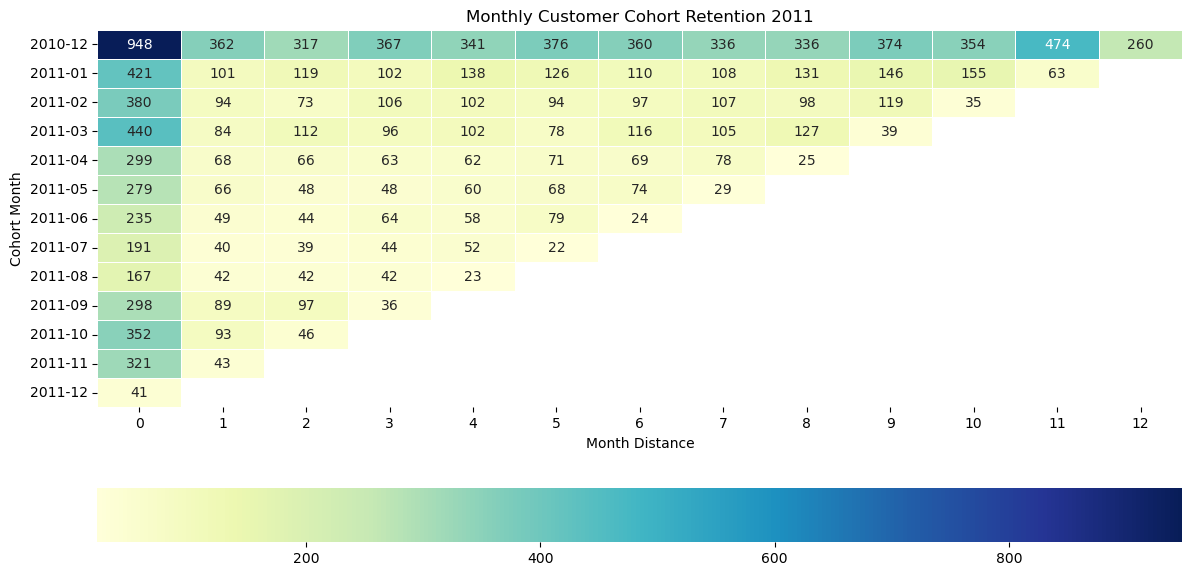

In [17]:
# Create the heatmap
plt.figure(figsize=(14, 7))
ax = sns.heatmap(cohort_retention_pivot,
                 annot=True,
                 fmt='.0f',
                 linewidths=0.5,
                 cbar_kws={'orientation': 'horizontal'},
                 cmap='YlGnBu')

# Set labels and title
ax.set_title('Monthly Customer Cohort Retention 2011')
ax.set_ylabel('Cohort Month')
ax.set_xlabel('Month Distance')

# Show the plot
plt.show()



### 4. Cohort Analysis : Data Visualization Lineplot

In [18]:
df_lineplot=cohort_retention.copy()
df_lineplot

,cohort_month,current_transaction_month,count_user,period_distance
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4
...,...,...,...,...
86,2011-10,2011-11,93,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,321,0
89,2011-11,2011-12,43,1


In [19]:
#convert date columns to str
df_lineplot['cohort_month']=df_lineplot['cohort_month'].astype(str)
df_lineplot['current_transaction_month']=df_lineplot['current_transaction_month'].astype(str)

#convert to percentage
df_lineplot_state=df_lineplot.groupby(['cohort_month']).agg({'count_user':'max'})
# df_lineplot[df_lineplot['period_distance']==0][['cohort_month','count_user']]
# df_lineplot_state

#create percent
df_plot=round(df_lineplot.set_index(['cohort_month']).div(df_lineplot_state, level='cohort_month'),2)
df_plot=df_plot.reset_index()[['cohort_month','count_user']].rename(columns={'count_user':'percentage_retention'})
# display(df_lineplot,df_lineplot_state,df_plot)

#add other columns
df_plot['current_transaction_month']=df_lineplot['current_transaction_month']
df_plot['period_distance']=df_lineplot['period_distance']
df_plot

,cohort_month,percentage_retention,current_transaction_month,period_distance
0,2010-12,1.00,2010-12,0
1,2010-12,0.38,2011-01,1
2,2010-12,0.33,2011-02,2
3,2010-12,0.39,2011-03,3
4,2010-12,0.36,2011-04,4
...,...,...,...,...
86,2011-10,0.26,2011-11,1
87,2011-10,0.13,2011-12,2
88,2011-11,1.00,2011-11,0
89,2011-11,0.13,2011-12,1


In [20]:
df_plot.to_csv('retention1.csv',index=False)

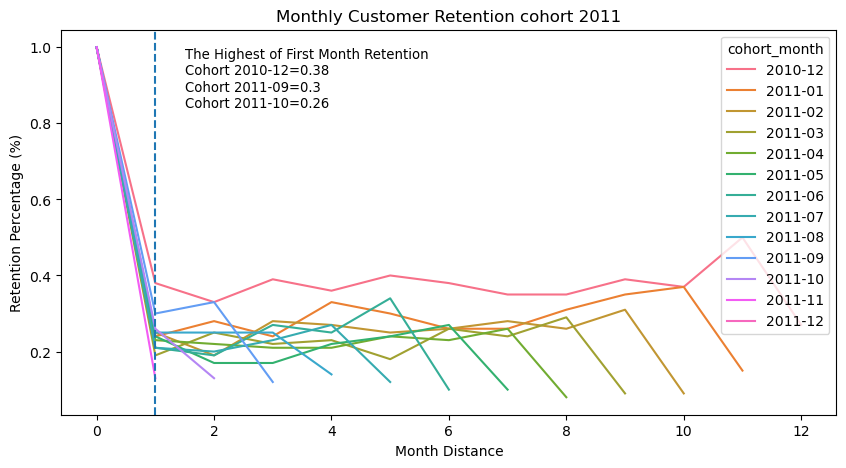

In [21]:
#Create Lineplot
plt.figure(figsize=(10,5))
ax=sns.lineplot(data=df_plot,
               x='period_distance',
               y='percentage_retention',
               hue='cohort_month')


# label sb x, sb y, title
ax.set_title('Monthly Customer Retention cohort 2011')
ax.set_ylabel('Retention Percentage (%)')
ax.set_xlabel('Month Distance')

#top 3
top_3=df_plot[df_plot['period_distance']==1].sort_values(by='percentage_retention',ascending=False).head(3)
top_3_name=top_3['cohort_month'].to_list()
top_3_value=[x for x in top_3['percentage_retention'].to_list()]

#string information
text_plot=f'''
The Highest of First Month Retention
Cohort {top_3_name[0]}={top_3_value[0]}
Cohort {top_3_name[1]}={top_3_value[1]}
Cohort {top_3_name[2]}={top_3_value[2]}
'''

plt.axvline(x=1,linestyle='--')
plt.text(1.5,0.8,text_plot,fontsize=9.5)
# plt.grid()
plt.show()

Hasil analisa cohort menunjukuan retention rate tertinggi pada bulan pertama retensi adalah 38% pada cohort Desember 2010, namun secara rata - rata bulan selanjutnya mengalami penurunan retensi. Secara rata - rata persentase retensi pada bulan pertama setelah cohort adalah 22%, angka ini di bawah angka rata - rata industri e-commerce yang sebesar 38% [1](https://www.moengage.com/learn/average-customer-retention-rate-by-industry/). Jika diperhatikan lebih detail, terdapat anomali pada bulan November yang memiliki angka retensi cenderung naik dari bulan sebelumnya, kemungkinan besar diakibatkan oleh event Black Friday. 

Retention rate dapat ditingkatkan dengan melakukan campaign, tetapi sebuah analisa lanjutan perlu dilakukan untuk mencari segmentasi dari customer agar campaign seperti promo discount, loyalty program dapat disalurkan dengan tepat sehingga biaya yang dikeluarkan akan efektif. RFM (Recency, Frequency, Monetary Value) merupakan salah satu analisa yang dapat dilakukan untuk membantu mencari kategori/segmen dari customer.

# Recency, Frequency, Monetary Value (RFM)

Timeframe yang digunakan untuk analisa RFM (Recency, Freqency, and Monetary Value) Metrics biasanya selama 1 thaun (12 bulan).

In [22]:
#Creating A new column of the sum of the transaction of the customer

df['TotalSum'] = df['Quantity'] * df['UnitPrice']

In [23]:
#Finding Out the oldest date and the newset date in the Dataset

print('Oldest Date: ', min(df.InvoiceDate))
print('Most Recent Date: ', max(df.InvoiceDate))

Oldest Date:  2010-12-01 08:26:00
Most Recent Date:  2011-12-09 12:50:00


In [24]:
# Creating new Current Date

from datetime import timedelta

new_current = max(df.InvoiceDate) + dt.timedelta(days=1)

print('Most Recent Date: ', max(df.InvoiceDate))
print('New Recent Date: ', new_current)

Most Recent Date:  2011-12-09 12:50:00
New Recent Date:  2011-12-10 12:50:00


In [25]:
#Creating RFM values

rfm_metric = df.groupby(['CustomerID']).agg({'InvoiceDate' : lambda x: (new_current - x.max()).days, 
                                            'InvoiceNo' : 'count',
                                            'TotalSum' : 'sum'})

#Renaming Column Names
rfm_metric = rfm_metric.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSum':'MonetaryValue'})

rfm_metric.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


1. **Recency** adalah jumlah hari sejak pelanggan melakukan transaksi terakhir.

2. **Frequency** adalah jumlah transaksi pelanggan pada 12 bulan terakhir.

3. **Monetary Value** adalah jumlah nilai transaksi yang dilakukan pelanggan pada 12 bulan terakhir.


In [26]:
#Creating Recency score based on quartile

r_labels = range(4, 0, -1)

r_quartiles = pd.qcut(rfm_metric['Recency'], 4, labels=r_labels)

rfm_metric = rfm_metric.assign(R = r_quartiles.values).astype('int64')

rfm_metric

,Recency,Frequency,MonetaryValue,R
CustomerID,,,,
12346.0,326,2,0,1
12347.0,2,182,4310,4
12348.0,75,31,1797,2
12349.0,19,73,1757,3
12350.0,310,17,334,1
...,...,...,...,...
18280.0,278,10,180,1
18281.0,181,7,80,1
18282.0,8,13,176,4


Semakin besar nilai recency menyebabkan semakin kecil nilai untuk R. Ini karena semakin banyak jumlah hari semenjak transaksi terakhir dari pelanggan merupakan indikasi yang buruk.

In [27]:
#Creating Frequency score and Monetary Value Score based on quartile

f_labels = range(1,5)
m_labels = range(1,5)

f_quartiles = pd.qcut(rfm_metric['Frequency'], 4, labels=f_labels)
m_quartiles = pd.qcut(rfm_metric['MonetaryValue'], 4, labels=m_labels)

rfm_metric = rfm_metric.assign(F = f_quartiles.values).astype('int64')
rfm_metric = rfm_metric.assign(M = m_quartiles.values).astype('int64')

rfm_metric

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0,1,1,1
12347.0,2,182,4310,4,4,4
12348.0,75,31,1797,2,2,4
12349.0,19,73,1757,3,3,4
12350.0,310,17,334,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180,1,1,1
18281.0,181,7,80,1,1,1
18282.0,8,13,176,4,1,1


Semakin besar nilai Frequency dan Monetary Value, semakin tinggi nilai untuk F dan M.

In [28]:
#Creating Column with total of RFM score

def join_rfm(n): return str(n['R']) + str(n['F']) + str(n['M'])

rfm_metric['RFM_Segment'] = rfm_metric.apply(join_rfm, axis=1)
rfm_metric['RFM_Score'] = rfm_metric[['R', 'F', 'M']].sum(axis=1)

rfm_metric

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0,1,1,1,111,3
12347.0,2,182,4310,4,4,4,444,12
12348.0,75,31,1797,2,2,4,224,8
12349.0,19,73,1757,3,3,4,334,10
12350.0,310,17,334,1,1,2,112,4
...,...,...,...,...,...,...,...,...
18280.0,278,10,180,1,1,1,111,3
18281.0,181,7,80,1,1,1,111,3
18282.0,8,13,176,4,1,1,411,6


Tujuan dibuatnya segmentasi RFM adalah untuk mengobservasi tipe - tipe berbeda dari kombinasi nilai. Nilai - nilai tersebut selanjutnya dapat diartikan sebagai segmentasi pelanggan. Setelah itu, segmentasi tersebut dapat digunakan sebagai dasar untuk menentukan strategi marketing.


In [29]:
print("Best Customers: ",len(rfm_metric[rfm_metric['RFM_Segment']=='444']))
print('Loyal Customers: ',len(rfm_metric[rfm_metric['F']==4]))
print("Big Spenders: ",len(rfm_metric[rfm_metric['M']==4]))
print('Almost Lost: ', len(rfm_metric[rfm_metric['RFM_Segment']=='244']))
print('Lost Customers: ',len(rfm_metric[rfm_metric['RFM_Segment']=='144']))
print('Lost Cheap Customers: ',len(rfm_metric[rfm_metric['RFM_Segment']=='111']))

Best Customers:  471
Loyal Customers:  1081
Big Spenders:  1093
Almost Lost:  103
Lost Customers:  20
Lost Cheap Customers:  392


In [30]:
best_cust = rfm_metric[rfm_metric['RFM_Segment']=='444']
almost_lost_cust = rfm_metric[rfm_metric['RFM_Segment']=='244']
lost_cust = rfm_metric[rfm_metric['RFM_Segment']=='144']
lost_cheap_cust = rfm_metric[rfm_metric['RFM_Segment']=='111']

### Conclusion

Hasil analisa cohort menunjukuan retention rate tertinggi pada bulan pertama retensi adalah 38% pada cohort Desember 2010, namun secara rata - rata bulan selanjutnya mengalami penurunan retensi. Secara rata - rata persentase retensi pada bulan pertama setelah cohort adalah 22%, angka ini di bawah angka rata - rata industri e-commerce yang sebesar 38% [1](https://www.moengage.com/learn/average-customer-retention-rate-by-industry/). Jika diperhatikan lebih detail, terdapat anomali pada bulan November yang memiliki angka retensi cenderung naik dari bulan sebelumnya, kemungkinan besar diakibatkan oleh event Black Friday.



### Recommendation

Karena persentase retensi yang cenderung lebih rendah dari rata - rata industri, terdapat potensi ruang perbaikan retensi yang tinggi. Hasil analisa RFM menghasilkan segmentasi pelanggan yang dapat dijadikan dasar untuk teknik marketing yang akan digunakan. Berikut merupakan contoh strategi marketing yang dapat diberikan untuk setiap segmentasi RFM.


| Segmentasi | RFM | Deskripsi | Strategi Marketing |
| --- | --- | --- | --- |
| Best Customers | 444 | Transaksi terbaru, transaksi terbanyak, dan nilai transaksi paling banyak | Tidak ada insetif harga, tawarkan produk baru, loyalty program |
| Loyal Customers | X4X | Transaksi terbanyak | Gunakan nilai R dan M untuk merinci segmentasi |
| Big Spenders | XX4 | Nilai transaksi terbanyak | Tawarkan produk dengan harga mahal |
| Almost Lost | 244 | Tidak melakukan transaksi dalam beberapa waktu terakhir, tetapi memiliki jumlah transaksi yang banyak dan nilai transaksi tinggi | Berikan insentif harga secara agresif |
| Lost Customers | 144 | Tidak melakukan transaksi dalam waktu lama, tetapi memiliki jumlah transaksi yang banyak dan nilai transaksi tinggi | Berikan insentif harga secara agresif |
| Lost Cheap Customers | 111 | Tidak melakukan transaksi dalam waktu lama, jumlah transaksi yang sedikit, dan nilai transaksi yang sedikit | Tidak perlu melakukan hal ekstra untuk diperoleh kembali |

Selain itu dapat digunakan machine learning untuk memberikan pengalaman belanja yang lebih personal bagi tiap pelanggan. Hasil analisa di atas juga dapat dijadikan acuan untuk melakukan investigasi lebih lanjut mengenai faktor - faktor apa saja yang menyebabkan retensi pelanggan menjadi turun.